In [57]:
# This is a ChatGPT solution for iterative solving 
# and needs to be trouble shot
# https://stackoverflow.com/questions/12926393/using-adaptive-step-sizes-with-scipy-integrate-ode
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def forward_euler(model, T, y0, dt = 0.01):
    mysolution = [y0]
    y = y0
    for t in np.arange(0, T, dt):
        dydt = model(t=t, y=y)
        y += dydt * dt
        mysolution.append(y)
    return mysolution

def model(t, y):
    return 3 * y

y0 = 0.2
T = 10
baseline = solve_ivp(model, [0, T], [y0], t_eval=np.arange(0, T, 0.01))
baseline = list(baseline.y[0, :].astype(float))
euler = forward_euler(model, T, y0)

print(len(baseline))
print(len(euler))
display(baseline[-10:])
display(euler[-10:])

In [68]:
# Chat GPT provided integrator
from scipy.integrate import solve_ivp
import numpy as np

# Define your differential equation function
def my_differential_equation(t, y, r = 2):
    # Define your differential equation here
    #dydt = -3 * y#[0]
    dydt = r*y*(1-y)
#    dxdt = -3 * y[1]
    return dydt# dxdt

# Define the initial conditions
t0 = 0.0
y0 = [0.2]#, 0.1]

# Define the time points where you want to evaluate the solution
T = 10
t_eval = range(T+1)

# Solve the differential equation
solution = solve_ivp(my_differential_equation, [t0, T], y0)

In [69]:
print(solution.y)

[[0.2        0.2296189  0.55959642 0.8816181  0.96314231 0.98917666
  0.99792104 0.99964294 0.99986144 0.99965986 0.9992625 ]]


In [60]:
mysolution = []
solution_at_t = y0
mysolution.append(solution_at_t)
for t in t_eval:
    solution_at_t = solve_ivp(
        my_differential_equation, 
        # might do say 5 small step sizes instead, but this occurs
        # per iteration of the loop, therefore more steps are taken 
        # in this loop than in the default ODE, therefore higher accuracy
        # from this manual looping
        # TODO: verify with something like logistic map
        [t, t+1],
        mysolution[t])
    solution_at_t = solution_at_t.y[:, -1]
    mysolution.append(solution_at_t)

mysolution = np.vstack(mysolution)
print(mysolution)
print(solution.y)

[[2.00000000e-01]
 [9.97406439e-03]
 [4.97603390e-04]
 [2.49271915e-05]
 [1.48139218e-06]
 [1.39413446e-07]
 [8.90077399e-09]
 [5.68264970e-10]
 [3.62805613e-11]
 [2.31631228e-12]
 [5.16187579e-13]
 [1.15031820e-13]]
[[2.00000000e-01 1.64812135e-01 6.53499885e-02 2.71996516e-02
  1.12688482e-02 4.65288404e-03 1.90500096e-03 7.65139050e-04
  2.94996662e-04 1.05131176e-04 3.27985891e-05 8.37546422e-06
  1.64973924e-06 2.94210940e-07 1.41378514e-07 4.24444068e-07
  5.17922957e-07 6.31989488e-07 1.27443191e-07]]


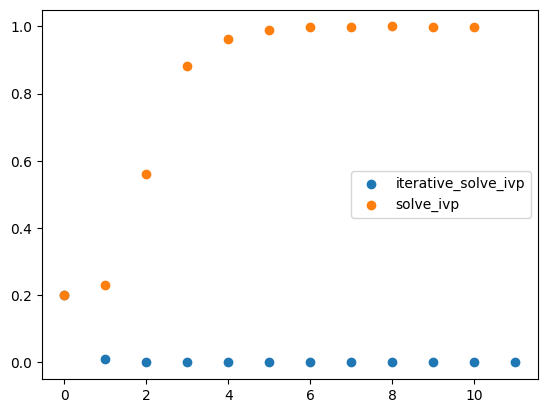

In [70]:
plt.scatter(range(len(mysolution)), mysolution.flatten(), label="iterative_solve_ivp")
plt.scatter(range(len(solution.y.flatten())), solution.y.flatten(), label="solve_ivp")
plt.legend()

In [23]:
print(solution.y.shape)
print(solution.y)

(1, 11)
[[ 2.00000000e-01  9.97279878e-03  4.96976155e-04  2.48429092e-05
   1.32975126e-06 -1.23717489e-08 -2.71390748e-07  3.29177056e-07
   5.59898231e-07  4.43189866e-07  1.27443191e-07]]


In [ ]:

# Iterate over the time points and update the solution
for i, t in enumerate(t_eval):
    current_solution = solution.y[:, i]
    # Perform any operations or calculations you need to do at each step
    # ...
    # Update the solution for the next iteration
    solution = solve_ivp(my_differential_equation, [t, T], current_solution, t_eval=t_eval[i+1:])

    # Continue with the next iteration
    ...
